In [1]:
import matplotlib.pyplot as plt
import numpy as np
import similarity_measurement

In [2]:
# For asap-dataset
# DATASET_ROOT = "../dataset/asap-dataset"
# SCORE_PREFIX = "midi_score"

# For newbie-dataset
DATASET_ROOT = "../dataset/newbie-dataset"
SCORE_PREFIX = "score"

NUM_SAMPLES = 100
QUEUE_SIZE = 8

SETTLING_FRAME = 3
FRAMES_PER_SECOND = 20  # Hz
SLICE_DURATION = [2.0, 5.0]  # sec
EXPANSION_RATE = [1.1, 3.0]
SUBSEQUENCE = True

In [3]:
pos_similarities, neg_similarities = similarity_measurement.run(dataset_root=DATASET_ROOT,
                                                                score_prefix=SCORE_PREFIX,
                                                                num_samples=NUM_SAMPLES,
                                                                queue_size=QUEUE_SIZE,
                                                                settling_frame=SETTLING_FRAME,
                                                                frames_per_second=FRAMES_PER_SECOND,
                                                                slice_duration=SLICE_DURATION,
                                                                expansion_rate=EXPANSION_RATE,
                                                                subsequence=SUBSEQUENCE,
                                                                verbose=True)

[70] Histogram: 0.0432, Timewarping: 0.0140, Length ratio: 1.4722:  71%|███████   | 71/100 [00:39<00:16,  1.80it/s, ..\dataset\newbie-dataset\Clementi\sonatina_op36_no3_pt1\0_wcpark_1.mid, (slice_duration=3.46, expansion_rate=1.42)]


In [4]:
pos_similarities = np.array(pos_similarities)
neg_similarities = np.array(neg_similarities)

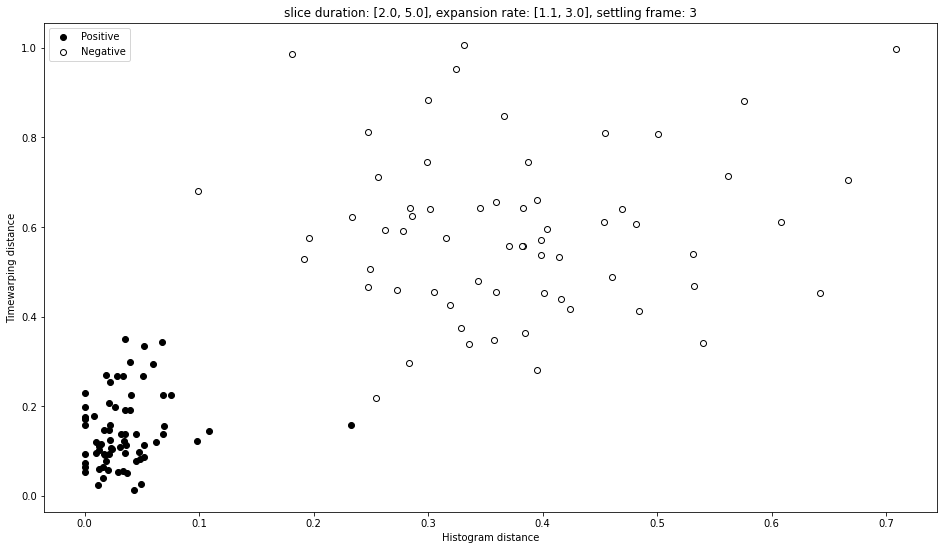

In [5]:
fig = plt.figure("scatter_2d", figsize=(16, 9), facecolor="white")
ax = fig.add_subplot()
ax.set_title(f"slice duration: {SLICE_DURATION}, expansion rate: {EXPANSION_RATE}, settling frame: {SETTLING_FRAME}")
ax.set_xlabel("Histogram distance")
ax.set_ylabel("Timewarping distance")
ax.scatter(pos_similarities[:, 0], pos_similarities[:, 1], c="k", label="Positive")
ax.scatter(neg_similarities[:, 0], neg_similarities[:, 1], c="w", edgecolors="k", label="Negative")
ax.legend()
plt.show()

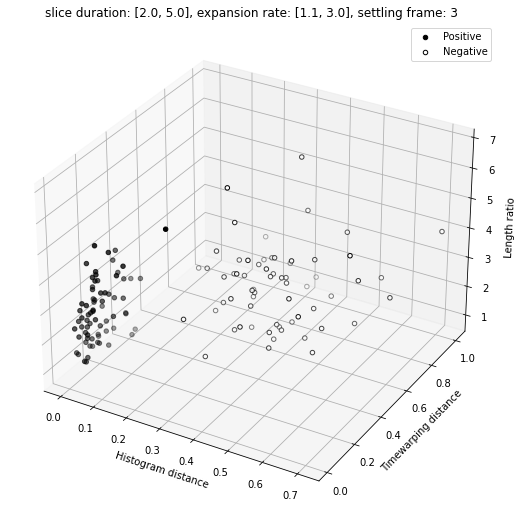

In [6]:
fig = plt.figure("scatter_3d", figsize=(16, 9), facecolor="white")
ax = fig.add_subplot(projection="3d")
ax.set_title(f"slice duration: {SLICE_DURATION}, expansion rate: {EXPANSION_RATE}, settling frame: {SETTLING_FRAME}")
ax.set_xlabel("Histogram distance")
ax.set_ylabel("Timewarping distance")
ax.set_zlabel("Length ratio")
ax.scatter(pos_similarities[:,0], pos_similarities[:,1], pos_similarities[:,2], c="k", label="Positive")
ax.scatter(neg_similarities[:,0], neg_similarities[:,1], neg_similarities[:,2], c="w", edgecolors="k", label="Negative")
ax.legend()
plt.show()